In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [12]:
# Load datasets
customers = pd.read_csv('Customers-checkpoint.csv')
transactions = pd.read_csv('Transactions.csv')

# Merge datasets
data = pd.merge(transactions, customers, on='CustomerID', how='inner')

In [13]:
# Encode categorical variables
le = LabelEncoder()
data['Region'] = le.fit_transform(data['Region'])

# Aggregate transaction data
agg_data = data.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spending
    'Quantity': 'sum',    # Total quantity purchased
    'Region': 'first'     # Region remains unchanged
}).reset_index()

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(agg_data[['TotalValue', 'Quantity', 'Region']])

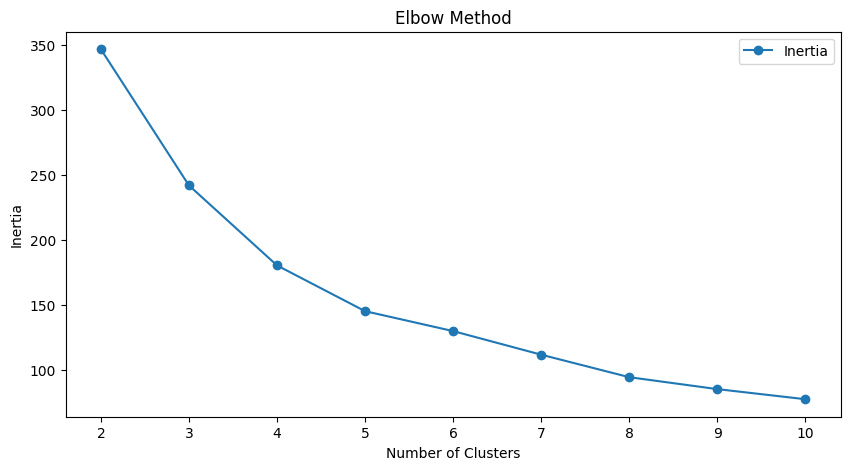

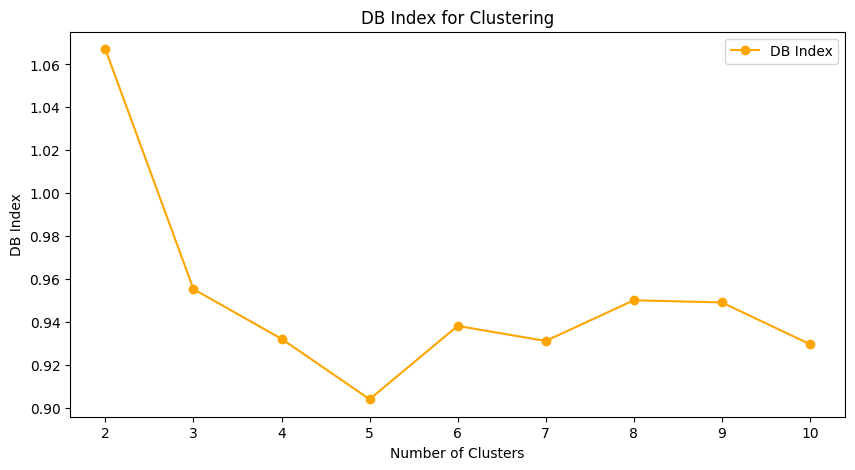

In [14]:
# Use the Elbow Method to find optimal clusters
inertia = []
db_indices = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    inertia.append(kmeans.inertia_)
    db_indices.append(davies_bouldin_score(scaled_data, clusters))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia, marker='o', label='Inertia')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.legend()
plt.show()

# Plot DB Index
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, db_indices, marker='o', color='orange', label='DB Index')
plt.title('DB Index for Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('DB Index')
plt.legend()
plt.show()

In [15]:
# Select optimal clusters (e.g., k=4 based on analysis)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Add cluster labels to the dataset
agg_data['Cluster'] = clusters

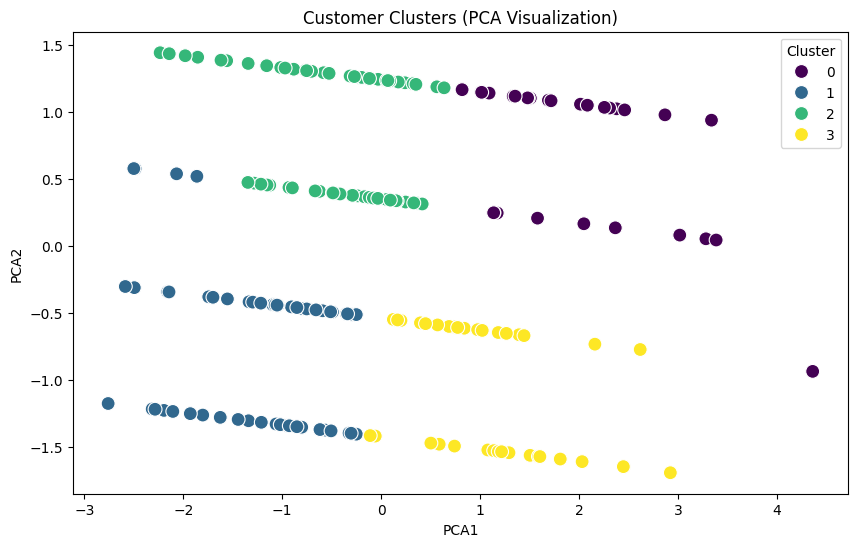

In [16]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Add PCA results to the dataset
agg_data['PCA1'] = pca_data[:, 0]
agg_data['PCA2'] = pca_data[:, 1]

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_data, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100)
plt.title('Customer Clusters (PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

In [17]:
# Analyze each cluster
cluster_analysis = agg_data.groupby('Cluster').agg({
    'TotalValue': ['mean', 'sum'],
    'Quantity': ['mean', 'sum'],
    'Region': lambda x: x.mode()[0]  # Most common region in the cluster
}).reset_index()

# Print cluster insights
print(cluster_analysis)

  Cluster   TotalValue              Quantity        Region
                  mean        sum       mean  sum <lambda>
0       0  5825.896875  186428.70  20.781250  665        3
1       1  2011.010508  118649.62   7.661017  452        1
2       2  2761.460857  193302.26  10.485714  734        3
3       3  5042.499474  191614.98  18.052632  686        0


In [18]:
# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_data, clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.932037310279212


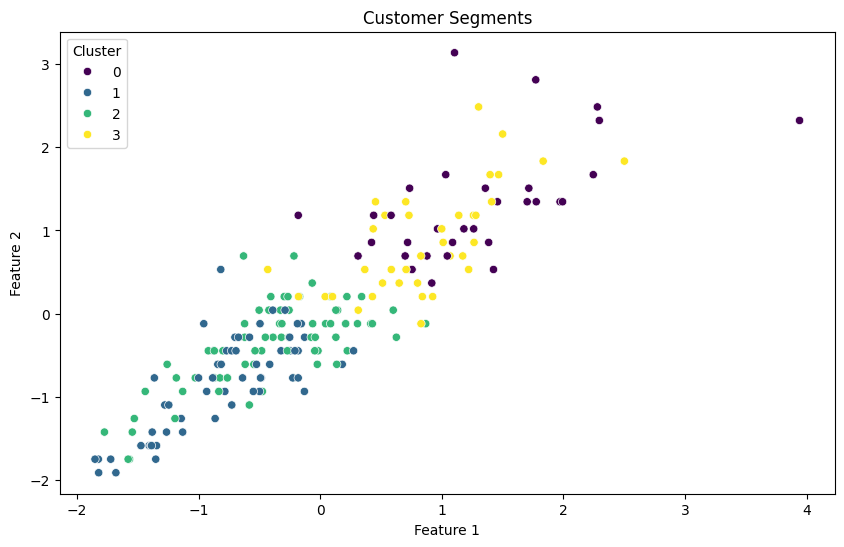

In [19]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=clusters, palette='viridis')
plt.title('Customer Segments')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(title='Cluster')
plt.show()